# Ventas de supermercado

Un supermercado con varias sucursales ha estado recopilando datos de sus ventas durante el último año. Sin embargo, debido a problemas con el sistema de captura de datos y la falta de controles de calidad, la base de datos contiene varios errores. La gerencia del supermercado necesita un análisis de estas ventas para tomar decisiones sobre la estrategia de precios, promociones y gestión de inventarios.

<b>Problema del negocio</b>

La gerencia ha notado una disminución en las ventas de algunos productos y un aumento inexplicable en otros. Quieren comprender mejor las tendencias de ventas para optimizar las compras y reducir las pérdidas. Sin embargo, antes de analizar los datos, es necesario limpiar la base de datos para asegurarse de que los análisis sean precisos.

<b>Tareas</b>

1. Limpieza de datos:

    - **Corregir valores faltantes:** Completar o eliminar filas con información incompleta.
    - **Eliminar duplicados**: Identificar y eliminar registros duplicados.
    - **Uniformizar formatos:** Asegurarse de que todos los precios y fechas tengan un formato consistente.
    - **Corregir errores tipográficos:** Revisar y corregir los nombres de productos, categorías y métodos de pago.
    - **Identificar y tratar valores atípicos:** Revisar precios y cantidades fuera de lo normal.


2. Análisis de Datos:

    - **Identificar tendencias:** Determinar qué productos y categorías han tenido un mejor rendimiento.
    - **Análisis por sucursal:** Comparar el desempeño de las diferentes sucursales.
    - **Preferencias de pago:** Analizar qué métodos de pago son más utilizados.
    - **Análisis temporal:** Examinar cómo varían las ventas a lo largo del tiempo, identificando posibles estacionalidades.

3. Visualización:

    - **Gráficos de ventas por categoría:** Crear gráficos que muestren las ventas por categoría y por sucursal.
    - **Tendencias temporales:** Graficar la evolución de las ventas a lo largo del año.
    - **Métodos de pago:** Visualizar la distribución de los diferentes métodos de pago utilizados.

## Solucion

1. Limpieza de Datos
    - **Corregir valores faltantes:** para corregir los valores faltantes tendremos que borrar los datos con valores nulos ya que al preguntar al encargado no pudo darnos estos valores faltantes
        

In [1]:
#primero haremos las importaciones necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#cargamos el dataset
df = pd.read_csv('dataset_ventas_supermercado.csv')

#mostramos las primeras 5 filas del dataset
df.head()

,Fecha de venta,Producto,Categoría,Precio,Cantidad vendida,Método de pago,Sucursal
0,2023-03-16,NaN,Bebidas,58.49,16.0,Efectivo,Sucursal B
1,15/11/2023,Café,Carnes,27.90,17.0,Tarjeta de débito,Sucursal A
2,2023-09-12,Plátanos,Lácteos,40.43,5.0,Tarjeta de débito,NaN
3,2023-07-17,Café,Lácteos,10.08,4.0,Efectivo,Sucursal C
4,19/03/2023,Manzanas,Granos,34.30,18.0,Tarjeta de débito,Sucursal C


In [3]:
# mostramos la cantidad de filas y columnas del dataset
print("(Filas, Columnas)")
print(df.shape)

(Filas, Columnas)
(520, 7)


In [4]:
# Veamos las variables categóricas y las numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha de venta    494 non-null    object 
 1   Producto          494 non-null    object 
 2   Categoría         494 non-null    object 
 3   Precio            494 non-null    float64
 4   Cantidad vendida  494 non-null    float64
 5   Método de pago    494 non-null    object 
 6   Sucursal          494 non-null    object 
dtypes: float64(2), object(5)
memory usage: 28.6+ KB


In [5]:
# Veamos la cantidad de valores nulos
df.isnull().sum()

Fecha de venta      26
Producto            26
Categoría           26
Precio              26
Cantidad vendida    26
Método de pago      26
Sucursal            26
dtype: int64

In [6]:
# en este caso vamos a eliminar las filas que contienen valores nulos, ya que no se cuenta con la informacion suficiente para rellenarlos
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 1 to 517
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha de venta    358 non-null    object 
 1   Producto          358 non-null    object 
 2   Categoría         358 non-null    object 
 3   Precio            358 non-null    float64
 4   Cantidad vendida  358 non-null    float64
 5   Método de pago    358 non-null    object 
 6   Sucursal          358 non-null    object 
dtypes: float64(2), object(5)
memory usage: 22.4+ KB


- **Eliminar duplicados**: Identificar y eliminar registros duplicados.

In [7]:
# Veamos la cantidad de valores duplicados
df.duplicated().sum()

5

In [8]:
# eliminamos los valores duplicados
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 1 to 515
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha de venta    353 non-null    object 
 1   Producto          353 non-null    object 
 2   Categoría         353 non-null    object 
 3   Precio            353 non-null    float64
 4   Cantidad vendida  353 non-null    float64
 5   Método de pago    353 non-null    object 
 6   Sucursal          353 non-null    object 
dtypes: float64(2), object(5)
memory usage: 22.1+ KB


- **Uniformizar formatos:** Asegurarse de que todos los precios y fechas tengan un formato consistente.

In [9]:
# vemos el tipo de datos de cada columna
df.dtypes


Fecha de venta       object
Producto             object
Categoría            object
Precio              float64
Cantidad vendida    float64
Método de pago       object
Sucursal             object
dtype: object

In [13]:
# estandarizamos los formatos de fecha

def convertir_fecha(fecha):
    for formato in ('%Y/%m/%d', '%Y-%m-%d', '%d/%m/%Y'):
        try:
            return pd.to_datetime(fecha, format=formato).strftime('%Y-%m-%d')
        except ValueError:
            continue
    return None

df['Fecha de venta'] = df['Fecha de venta'].apply(convertir_fecha)

#mostramos el dataset
df.head()


,Fecha de venta,Producto,Categoría,Precio,Cantidad vendida,Método de pago,Sucursal
1,2023-11-15,Café,Carnes,27.90,17.0,Tarjeta de débito,Sucursal A
3,2023-07-17,Café,Lácteos,10.08,4.0,Efectivo,Sucursal C
4,2023-03-19,Manzanas,Granos,34.30,18.0,Tarjeta de débito,Sucursal C
5,2023-02-21,Pollo,Granos,52.73,19.0,Tarjeta de crédito,Sucursal A
6,2023-05-18,Manzanas,Bebidas,73.49,4.0,PayPal,Sucursal B


In [14]:
#validamos que la columna Fecha de venta sea de tipo fecha
df['Fecha de venta'] = pd.to_datetime(df['Fecha de venta'])
df.dtypes

Fecha de venta      datetime64[ns]
Producto                    object
Categoría                   object
Precio                     float64
Cantidad vendida           float64
Método de pago              object
Sucursal                    object
dtype: object

In [15]:
#validamos que la columna Cantidad sea de tipo numerico
df['Cantidad vendida'] = pd.to_numeric(df['Cantidad vendida'], errors='coerce')
df.dtypes

Fecha de venta      datetime64[ns]
Producto                    object
Categoría                   object
Precio                     float64
Cantidad vendida           float64
Método de pago              object
Sucursal                    object
dtype: object

In [16]:
#validamos que la columna precio tenga el formato correcto
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
df.dtypes

Fecha de venta      datetime64[ns]
Producto                    object
Categoría                   object
Precio                     float64
Cantidad vendida           float64
Método de pago              object
Sucursal                    object
dtype: object

- **Corregir errores tipográficos:** Revisar y corregir los nombres de productos, categorías y métodos de pago.

In [17]:
#vemos los valores unicos de la columna Producto
df['Producto'].unique()

array(['Café', 'Manzanas', 'Pollo', 'Pasta', 'Huevos', 'Arroz',
       'Naranjas', 'Plátanos', 'Leche', 'Pan'], dtype=object)

In [18]:
#vemos los valores unicos de la columna Categoria
df['Categoría'].unique()

array(['Carnes', 'Lácteos', 'Granos', 'Bebidas', 'Frutas'], dtype=object)

In [19]:
#vemos los valores unicos de la columna Metodos de pago
df['Método de pago'].unique()

array(['Tarjeta de débito', 'Efectivo', 'Tarjeta de crédito', 'PayPal'],
      dtype=object)

- **Identificar y tratar valores atípicos:** Revisar precios y cantidades fuera de lo normal.

In [20]:
#revisamos cantidades negativas
df[df['Cantidad vendida'] < 0]

,Fecha de venta,Producto,Categoría,Precio,Cantidad vendida,Método de pago,Sucursal


In [21]:
#revisamos ventas con precio 0
df[df['Precio'] <= 0]

,Fecha de venta,Producto,Categoría,Precio,Cantidad vendida,Método de pago,Sucursal


In [22]:
#revisamos valores 
df.describe()

,Fecha de venta,Precio,Cantidad vendida
count,353,353.000000,353.000000
mean,2023-07-02 13:44:01.359773440,50.402238,9.597734
min,2023-01-01 00:00:00,1.100000,1.000000
25%,2023-04-09 00:00:00,25.510000,5.000000
50%,2023-07-03 00:00:00,52.650000,9.000000
75%,2023-09-25 00:00:00,74.940000,14.000000
max,2023-12-31 00:00:00,99.340000,19.000000
std,NaN,28.425441,5.539855


al tener en la desviacion estandar valores diferentes a 0 significa que no tienen un valor unico.

vemos el valor minimo de 1.1 y maximo de 99.34 en precio asi que tenemos que revisarlos

<Axes: xlabel='Categoría', ylabel='Precio'>

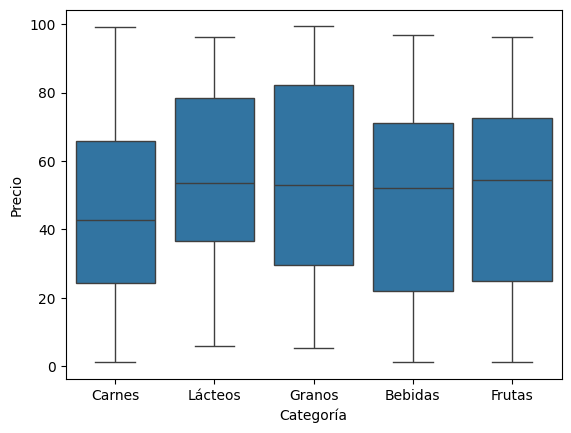

In [23]:
#mostramos los precios de los productos por categoria
sns.boxplot(x='Categoría', y='Precio', data=df)

al ver la grafica de cajas podemos observar que no hay valores atipicos en ninguna de las categorias 

In [24]:
#mostramos todos los valores de las columnas categoria  y producto
df.groupby(['Categoría', 'Producto']).size()


Categoría  Producto
Bebidas    Arroz        5
           Café        10
           Huevos       8
           Leche        2
           Manzanas     4
           Naranjas    10
           Pan          8
           Pasta       12
           Plátanos     7
           Pollo        9
Carnes     Arroz        5
           Café        10
           Huevos       4
           Leche        7
           Manzanas    11
           Naranjas     4
           Pan          4
           Pasta        3
           Plátanos     8
           Pollo        6
Frutas     Arroz       11
           Café         7
           Huevos       8
           Leche        6
           Manzanas     8
           Naranjas     7
           Pan         10
           Pasta        3
           Plátanos     6
           Pollo        6
Granos     Arroz        5
           Café        10
           Huevos       7
           Leche        6
           Manzanas    10
           Naranjas    13
           Pan          8
           Pasta  

al ver desplegada la informacion de productos por categoria vemos que hay productos en categorias erroneas

In [25]:
#mostramos los productos
df['Producto'].value_counts()


Producto
Café        47
Pan         40
Manzanas    38
Naranjas    38
Pasta       34
Huevos      34
Pollo       31
Arroz       31
Plátanos    31
Leche       29
Name: count, dtype: int64

In [26]:
#mosytamos las categorias
df['Categoría'].value_counts()

Categoría
Granos     75
Bebidas    75
Frutas     72
Lácteos    69
Carnes     62
Name: count, dtype: int64

In [27]:
#hacemos un diccionario de mapeo para las categorias
categorias = {
    'Granos': ['Arroz','Pan','Pasta'],
    'Lácteos': ['Leche'],
    'Carnes': ['Pollo','Huevos'],
    'Frutas': ['Manzanas','Plátanos','Naranjas'],
    'Bebidas': ['Café'],
}

#creamos una nueva columna con las categorias
df['Categoria Corregida'] = df['Producto'].apply(lambda x: next((k for k, v in categorias.items() if x in v), None))

#mostramos el dataset
df.head()



,Fecha de venta,Producto,Categoría,Precio,Cantidad vendida,Método de pago,Sucursal,Categoria Corregida
1,2023-11-15,Café,Carnes,27.90,17.0,Tarjeta de débito,Sucursal A,Bebidas
3,2023-07-17,Café,Lácteos,10.08,4.0,Efectivo,Sucursal C,Bebidas
4,2023-03-19,Manzanas,Granos,34.30,18.0,Tarjeta de débito,Sucursal C,Frutas
5,2023-02-21,Pollo,Granos,52.73,19.0,Tarjeta de crédito,Sucursal A,Carnes
6,2023-05-18,Manzanas,Bebidas,73.49,4.0,PayPal,Sucursal B,Frutas


In [28]:
#mostramos todos los valores de las columnas categoria  y producto para ver si se corrigieron
df.groupby(['Categoria Corregida', 'Producto']).size()


Categoria Corregida  Producto
Bebidas              Café        47
Carnes               Huevos      34
                     Pollo       31
Frutas               Manzanas    38
                     Naranjas    38
                     Plátanos    31
Granos               Arroz       31
                     Pan         40
                     Pasta       34
Lácteos              Leche       29
dtype: int64

In [29]:
#creamos una columna con el total de la venta
df['Total'] = df['Cantidad vendida'] * df['Precio']
df.head()

,Fecha de venta,Producto,Categoría,Precio,Cantidad vendida,Método de pago,Sucursal,Categoria Corregida,Total
1,2023-11-15,Café,Carnes,27.90,17.0,Tarjeta de débito,Sucursal A,Bebidas,474.30
3,2023-07-17,Café,Lácteos,10.08,4.0,Efectivo,Sucursal C,Bebidas,40.32
4,2023-03-19,Manzanas,Granos,34.30,18.0,Tarjeta de débito,Sucursal C,Frutas,617.40
5,2023-02-21,Pollo,Granos,52.73,19.0,Tarjeta de crédito,Sucursal A,Carnes,1001.87
6,2023-05-18,Manzanas,Bebidas,73.49,4.0,PayPal,Sucursal B,Frutas,293.96


In [30]:
#igualamos categoria corregida a categoria
df['Categoría'] = df['Categoria Corregida']
df = df.drop(columns=['Categoria Corregida'])
df.head()

,Fecha de venta,Producto,Categoría,Precio,Cantidad vendida,Método de pago,Sucursal,Total
1,2023-11-15,Café,Bebidas,27.90,17.0,Tarjeta de débito,Sucursal A,474.30
3,2023-07-17,Café,Bebidas,10.08,4.0,Efectivo,Sucursal C,40.32
4,2023-03-19,Manzanas,Frutas,34.30,18.0,Tarjeta de débito,Sucursal C,617.40
5,2023-02-21,Pollo,Carnes,52.73,19.0,Tarjeta de crédito,Sucursal A,1001.87
6,2023-05-18,Manzanas,Frutas,73.49,4.0,PayPal,Sucursal B,293.96


In [31]:
#guardamos el dataset limpio
df.to_csv('dataset_ventas_supermercado_limpio.csv', index=False)

2. Análisis de Datos:

    - **Identificar tendencias:** Determinar qué productos y categorías han tenido un mejor rendimiento.

In [35]:
#mostrar que productos y categorias han tenido un mejor rendimiento
df.groupby(['Categoría', 'Producto'])['Total'].sum().sort_values(ascending=False)

Categoría  Producto
Bebidas    Café        23233.69
Granos     Pasta       21457.66
           Pan         20244.05
Carnes     Huevos      16724.17
Frutas     Naranjas    16654.81
           Manzanas    16331.28
Lácteos    Leche       16238.84
Carnes     Pollo       14398.71
Granos     Arroz       14239.53
Frutas     Plátanos    13198.32
Name: Total, dtype: float64

<Axes: xlabel='Categoría,Producto'>

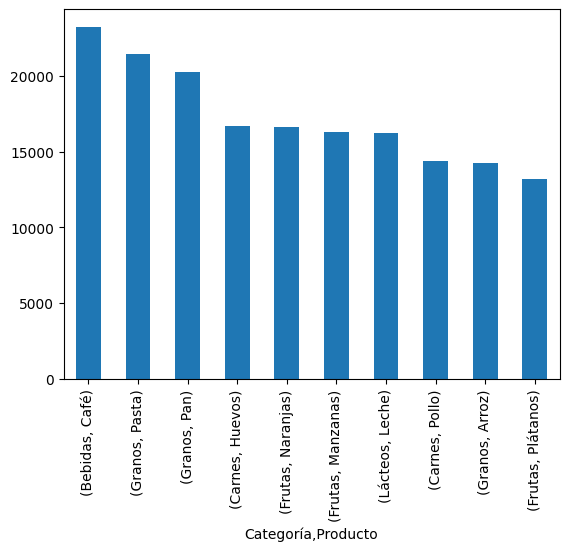

In [33]:
#grafiocamos los productos con mejor rendimiento
df.groupby(['Categoría', 'Producto'])['Total'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Categoría'>

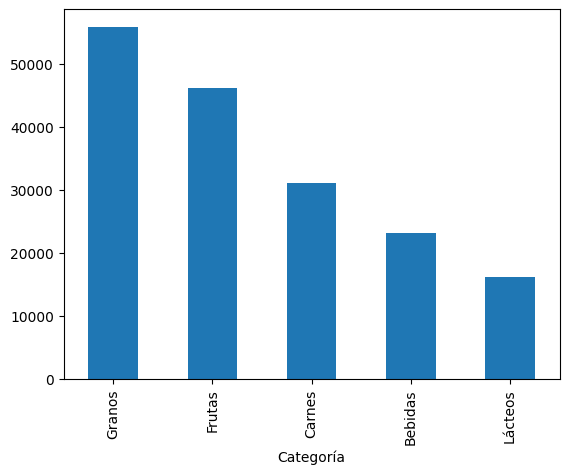

In [36]:
#mostramnos las categorias con mejor rendimiento
df.groupby(['Categoría'])['Total'].sum().sort_values(ascending=False).plot(kind='bar')

Despues de estas dos graficas podemos ver que los productos con mayor rendimiento son `Café`, `Pasta` y `Pan` y las categorias con mayor rendimiento son `Granos`, `Frutas` y `Carnes`

- **Análisis por sucursal:** Comparar el desempeño de las diferentes sucursales.

<Axes: xlabel='Sucursal'>

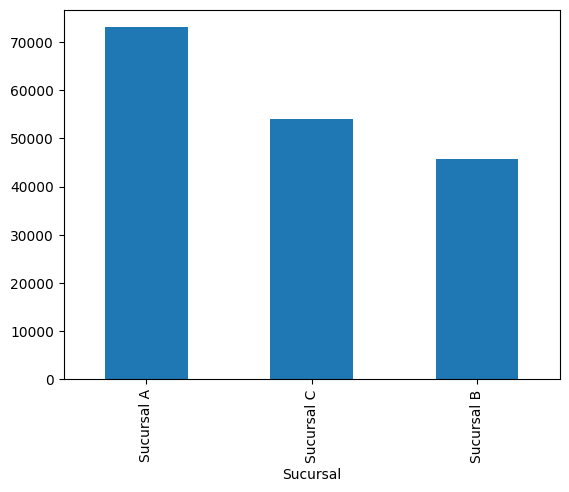

In [37]:
#comparamos el desempeño de las sucursales
df.groupby(['Sucursal'])['Total'].sum().sort_values(ascending=False).plot(kind='bar')

La grafica anterior nos muestra que la sucursal con mayor desempeño es la `A`

- **Preferencias de pago:** Analizar qué métodos de pago son más utilizados.

<Axes: xlabel='Método de pago'>

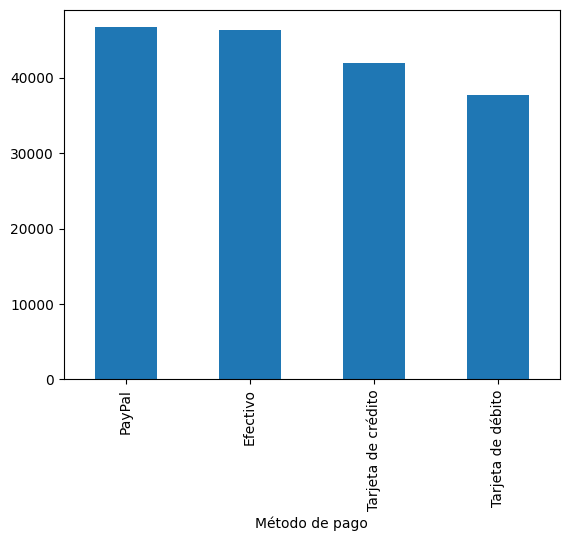

In [38]:
#mostramos las ventas por metodo de pago
df.groupby(['Método de pago'])['Total'].sum().sort_values(ascending=False).plot(kind='bar')

In [39]:
#contamos el total de ventas

df['Total'].sum()


172721.06

la grafica nos muestra que los metodos de pago mas utilizados son `PayPal` y `Efectivo`

 - **Análisis temporal:** Examinar cómo varían las ventas a lo largo del tiempo, identificando posibles estacionalidades.

<Axes: xlabel='Mes'>

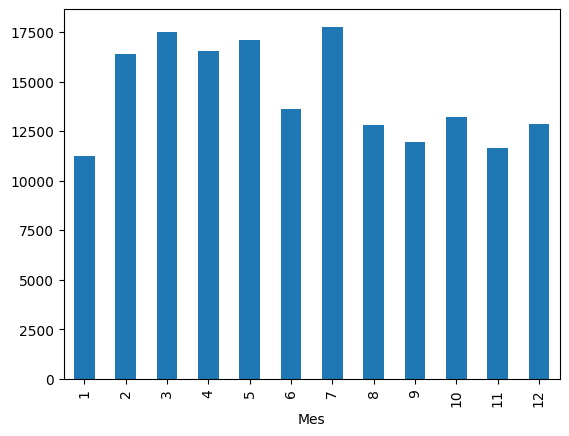

In [40]:
#mostramnos las ventas por mes
df['Mes'] = df['Fecha de venta'].dt.month
df.groupby(['Mes'])['Total'].sum().plot(kind='bar')


podemos ver que los mese con mayor venta fueron `Julio` y `Marzo`

mientras que el periodo con mas ventas fue `Febrero - Mayo`

<Axes: xlabel='Mes'>

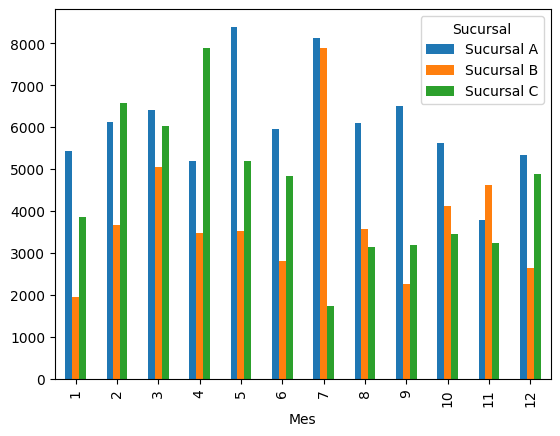

In [41]:
#mostramos las ventas por mes, sucursal y categoria
df['Mes'] = df['Fecha de venta'].dt.month
df.groupby(['Mes', 'Sucursal'])['Total'].sum().unstack().plot(kind='bar')

<Axes: xlabel='Mes'>

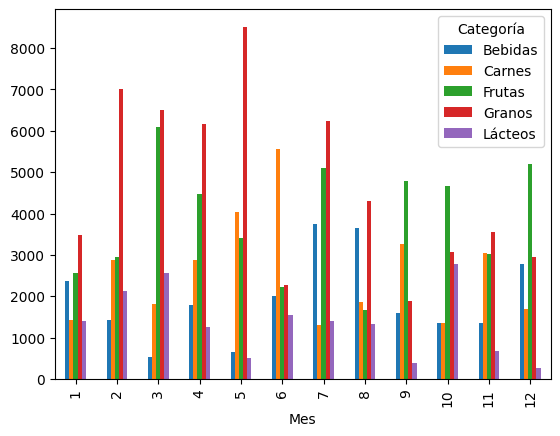

In [42]:
#mostramos las ventas por mes y categoria
df.groupby(['Mes', 'Categoría'])['Total'].sum().unstack().plot(kind='bar')


<Axes: xlabel='Categoría'>

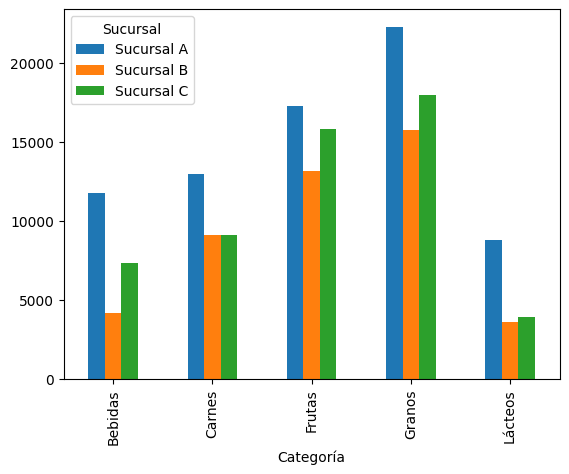

In [43]:
#mostramos ventaspor categoria y sucural
df.groupby(['Categoría', 'Sucursal'])['Total'].sum().unstack().plot(kind='bar')

3. Visualización:
    - **Gráficos de ventas por categoría:** Crear gráficos que muestren las ventas por categoría y por sucursal.

<Axes: xlabel='Sucursal'>

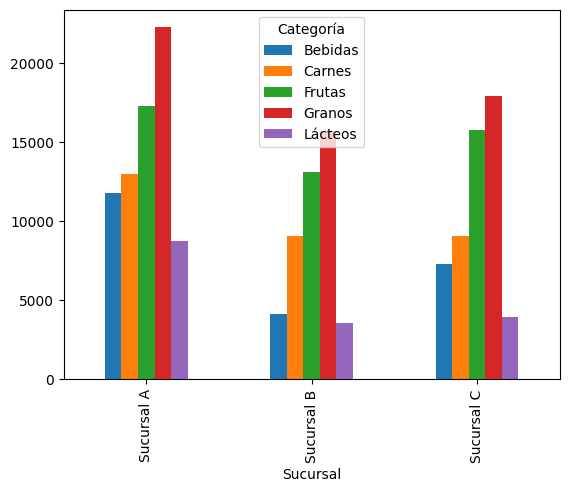

In [44]:
#creamos un grafico que muestre las ventas por sucursal y categoria
df.groupby(['Sucursal', 'Categoría'])['Total'].sum().unstack().plot(kind='bar')

- **Tendencias temporales:** Graficar la evolución de las ventas a lo largo del año.

<Axes: xlabel='Año,Mes'>

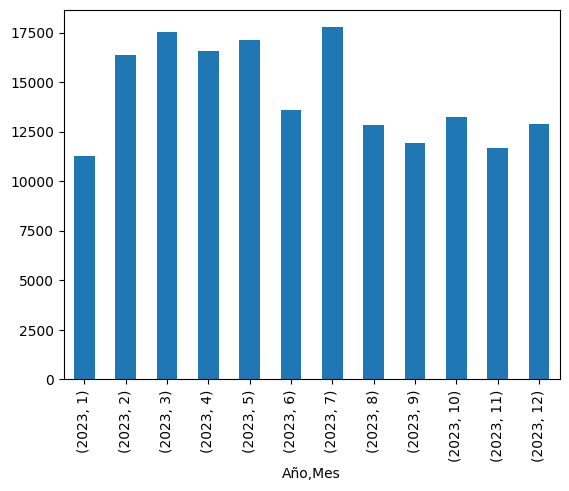

In [45]:
#mostramos la venta a lo largo del año  
df['Año'] = df['Fecha de venta'].dt.year
df.groupby(['Año', 'Mes'])['Total'].sum().plot(kind='bar')


- **Métodos de pago:** Visualizar la distribución de los diferentes métodos de pago utilizados.

<Axes: xlabel='Método de pago'>

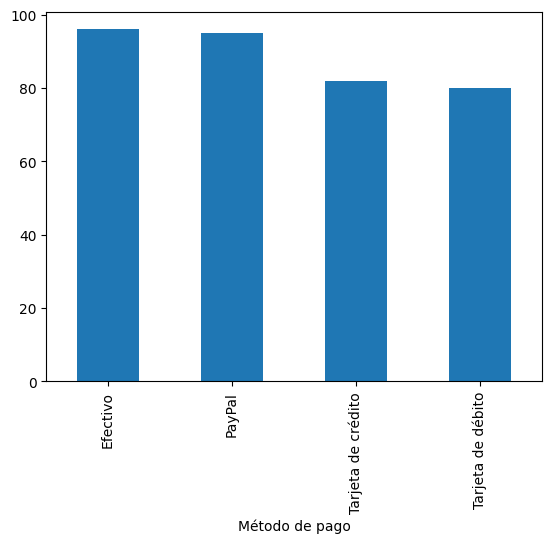

In [46]:
#mostramos la distribucion de los metodos de pago
df['Método de pago'].value_counts().plot(kind='bar')

<Axes: xlabel='Categoría', ylabel='Precio'>

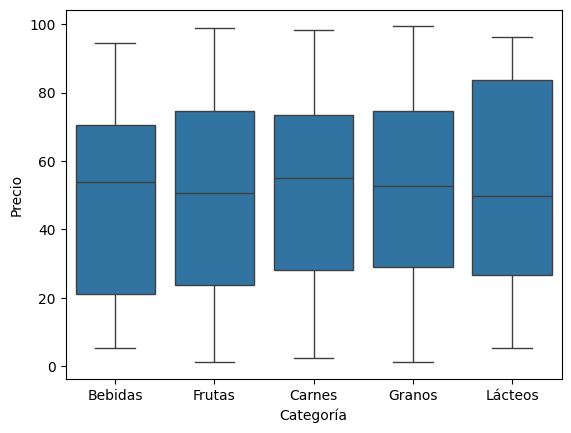

In [47]:
sns.boxplot(x='Categoría', y='Precio', data=df)